In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_21/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# Regresión Lineal con scikit-learn y statsmodels  

## Resumen


<div>
<img src="https://www.aboutbrasil.com/modules/images/Soccer_fans_Beer_Brazil.jpg" width="200"/>
</div>

La cerveza es una de las bebidas más consumidas del mundo, perfecta para casi cualquier situación. Alrededor del mundo miles de personas la consumen regularmente. Sin embargo, ¿alguna vez te has detenido a pensar qué países son la cerveza más consumidora del mundo? ¿El primero que se te ocurrió fue **Alemania**? Bueno, sé que no es así.



La respuesta a esa pregunta es rotunda: la República Checa. Según una investigación de la compañía de bebidas japonesa [Kirin](https://www.kirinholdings.co.jp/english/news/2019/1224_01.html), el país ha encabezado la tabla de consumo de cerveza per cápita durante 26 años consecutivos.
En 2019, el año más reciente para el que hay estadísticas disponibles, los checos bebieron 191 litros por persona!!! **CASI 200 litros!!!!**

### Acerca del dataset


Los datos (muestra) fueron recolectados en São Paulo - Brasil, en un área universitaria, donde hay algunas fiestas con grupos de estudiantes de 18 a 28 años de edad (promedio). El conjunto de datos utilizado para esta actividad tiene 7 atributos, siendo un Objetivo, con un período de un año. Los datos o recursos te los podes descarfar desde [aqui](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True) #do not miss this line
import warnings

warnings.filterwarnings('ignore')



In [3]:
data=pd.read_csv("../Data/Consumo_cerveja.csv",parse_dates=['Fecha'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               365 non-null    datetime64[ns]
 1   Temperatura_Media   365 non-null    float64       
 2   Temperatura_Minima  365 non-null    float64       
 3   Temperatura_Maxima  365 non-null    float64       
 4   Precipitac          365 non-null    float64       
 5   Fin_de_Semana       365 non-null    float64       
 6   Consumo_de_cerveza  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.1 KB


In [5]:
data.head()

,Fecha,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitac,Fin_de_Semana,Consumo_de_cerveza
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [6]:
data.corr()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitac,Fin_de_Semana,Consumo_de_cerveza
Temperatura_Media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura_Minima,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura_Maxima,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitac,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Fin_de_Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo_de_cerveza,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


### ¿ Qué dia de la semana ?

In [7]:
data['dia_semana']=data.Fin_de_Semana.apply(lambda x: 'Dia_de_Semana' if x==0 else 'Fin_de_semana')

Text(0, 0.5, 'Consumo de cerveza')

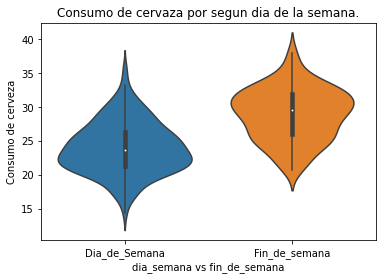

In [8]:
# violin plot

sns.violinplot(x="dia_semana", y="Consumo_de_cerveza",data=data)
plt.title("Consumo de cervaza por segun dia de la semana.")
plt.xlabel('dia_semana vs fin_de_semana')
plt.ylabel("Consumo de cerveza")

## Distribución del consumo semanal.

Representemos en un gráfico de torta la distribución del consumo semanal en la categorías semana y fin de semana.

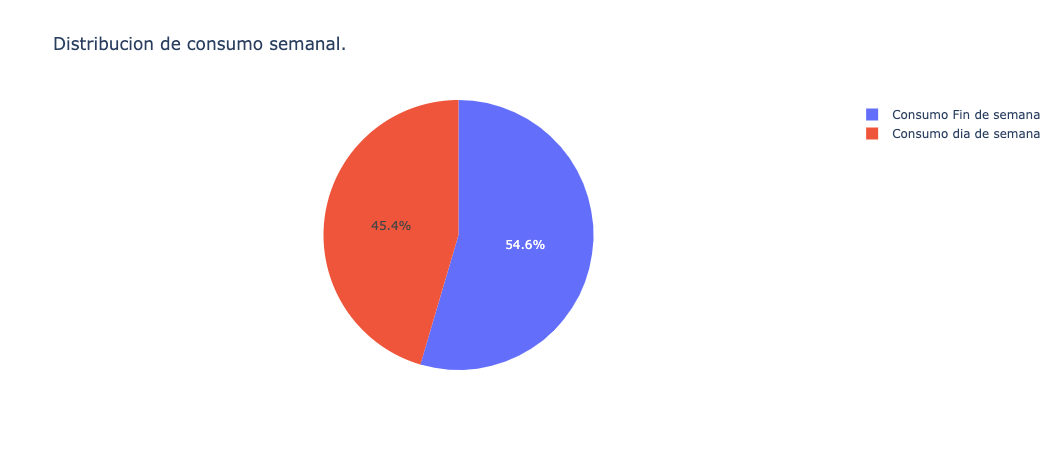

In [9]:
# grafico de torta.
dow=sum(data.Consumo_de_cerveza[data.Fin_de_Semana==0])/5
weekend=sum(data.Consumo_de_cerveza[data.Fin_de_Semana==1])/2
labels = ['Consumo dia de semana','Consumo Fin de semana']
values = [dow,weekend]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Distribucion de consumo semanal.')


## Relacion entre el consumo y la temperatura

### Influencia de la temperatura. 
Nuestra intuicion nos señala que probablemente el consumo de cerveza aumente conforme aumente la temperatura. 
* ¿Cómo es cambia la temperatura en brasil segun las estaciones del año?

Datos climaticos de brasil sugieren que la misma sigue la siguiente tendencia.

<div>
<img src="https://images.climate-data.org/location/655/temperature-graph.png" width="600"/>
</div>

### Variación del consumo de cerveza por mes.

Representemos, usando boxplots para cada mes, el consumo de cerveza en litros.

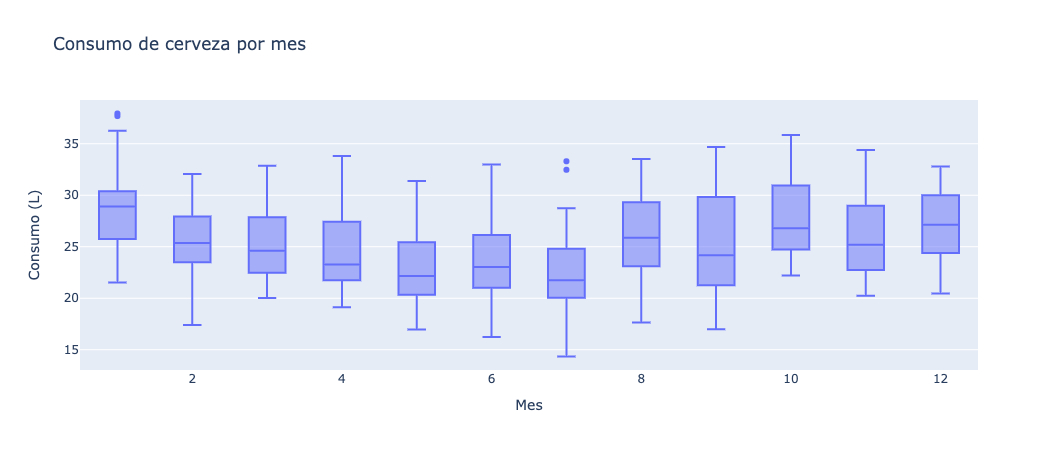

In [10]:
data['month'] = pd.to_datetime(data['Fecha']).dt.month
fig = go.Figure(data=go.Box(x=data.month,y=data.Consumo_de_cerveza.values))
fig.update_layout(title='Consumo de cerveza por mes',
                   xaxis_title='Mes',
                   yaxis_title='Consumo (L)')

fig.show()

Parece que existe una relacion entre la temperatura y el consumo. ¿Será que tomamos cerveza para refrescarnos?

Usemos un heatmap para representar la matriz de correlaciones

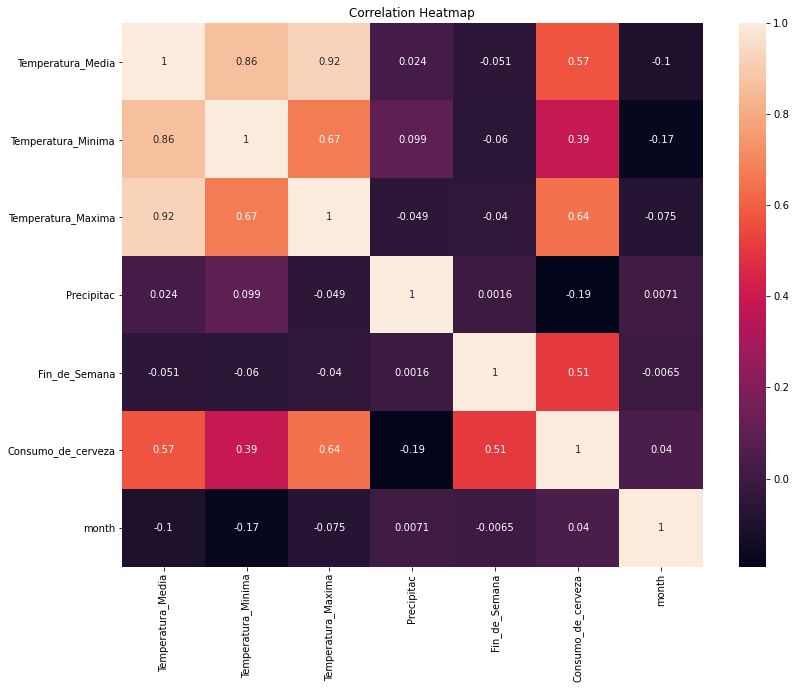

In [11]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
data.columns


Index(['Fecha', 'Temperatura_Media', 'Temperatura_Minima',
       'Temperatura_Maxima', 'Precipitac', 'Fin_de_Semana',
       'Consumo_de_cerveza', 'dia_semana', 'month'],
      dtype='object')

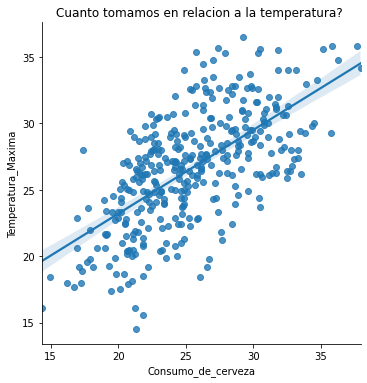

In [13]:
sns.lmplot(x="Consumo_de_cerveza", y="Temperatura_Maxima", data=data)
plt.title("Cuanto tomamos en relacion a la temperatura? ")
plt.show()

<div class="alert alert-block alert-success">
<b>Conclusiones:</b> 
    Encontramos algunas relaciones lógicas entre el consumo de cerveza y la temperatura o el momento de la semana.
    Dado que encontramos tal vez una relacion lineal entre la temperatura maxima y el consumo podemos entrenar un modelo lineal para predecir el consumo dado la temperatura.
</div>

### Modelo Lineal

Calculemos una regresión lineal ajustando el modelo con la variable predictora temperatura máxima.

Grafiquemos usando un scatterplot los datos y la recta resultado del ajuste.

Usando la regresión lineal construida, cuál es el valor predicho cuando la temperatura máxima es 30 grados?

In [14]:
# Separo el dataset en X e y.
x=data.Consumo_de_cerveza.values.reshape(-1,1)
y=data.Temperatura_Maxima.values.reshape(-1,1)
x.shape,y.shape


((365, 1), (365, 1))

In [15]:
from sklearn.linear_model import LinearRegression
# Instancio el modelo.
lr=LinearRegression()
# Fiteo el modelo con la variable predictora temperatura máxima.
lr.fit(x,y)

LinearRegression()

In [16]:
array=np.arange(50).reshape(-1,1)
y_head=lr.predict(array)

In [20]:
print ('Intercepto=', ' ', lr.intercept_)
print ('RM=', ' ', lr.coef_)

Intercepto=   [10.59021293]
RM=   [[0.63072566]]


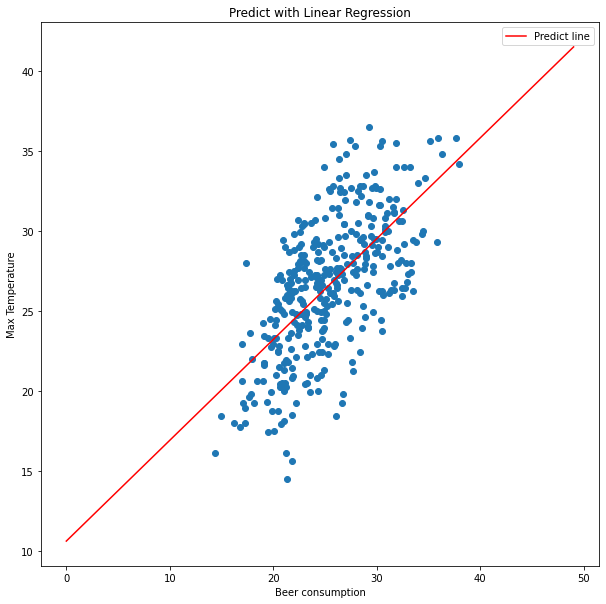

In [17]:
plt.figure(figsize=(10,10))
plt.plot(array,y_head,color="red",label="Predict line")
plt.scatter(x,y)
plt.title("Predict with Linear Regression")
plt.xlabel("Beer consumption")
plt.ylabel("Max Temperature")
plt.legend()
plt.show()

In [18]:
lr.predict([[30]])

array([[29.51198258]])